In [218]:
"""
For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

1. Dealing with the data
2. Show the dataframe shape.
3. Standardize header names.
4. Which columns are numerical?
5. Which columns are categorical?
6. Check and deal with NaN values.
7. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
8. BONUS: Put all the previously mentioned data transformations into a function.

"""

'\nFor this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.\n\nNote: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.\n\n1. Dealing with the data\n2. Show the dataframe shape.\n3. Standardize header names.\n4. Which columns are numerical?\n5. Which columns are categorical?\n6. Check and deal with NaN values.\n7. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.\n8. BONUS: Put all the previously mentioned data transformations into a function.\n\n'

In [219]:
import pandas as pd
import numpy as np

In [220]:
#import file csv

mca_file = pd.read_csv('./csv_files/marketing_customer_analysis.csv')
mca_file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [221]:
#2. Show the dataframe shape.

mca_file.shape

(10910, 26)

In [222]:
#3. Standardize header names.
columns_names = mca_file.columns

#lowercase all column's name 

cols = []
for c in columns_names:
    cols.append(c.lower())
cols

mca_file.columns = cols

mca_file.head()


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [223]:
#4. Which columns are numerical?
#5. Which columns are categorical?

#df.select_dtypes('int64','float')

display(mca_file.dtypes)
#mca_file

#numerical:
"""
num_cols = ['int64', 'float64']
num_cols = mca_file.select_types(include=num_cols)
num_cols
"""
#categorical:

"""
cat_cols = ['int64', 'float64']
cat_cols = mca_file.select_types(include=cat_cols)
cat_cols
"""


unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

"\ncat_cols = ['int64', 'float64']\ncat_cols = mca_file.select_types(include=cat_cols)\ncat_cols\n"

In [224]:
#6. Check and deal with NaN values.

null_values = mca_file.isnull()

print(null_values.sum())

#remove null values

mca_file = mca_file.dropna()
mca_file

null_values2=mca_file.isnull()
print(null_values2.sum())
mca_file

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [225]:
#7. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

mca_file['months'] = pd.DatetimeIndex(mca_file['effective to date']).month
mca_file.head()


#extract months


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2


In [226]:
#check month numbers

mca_file['months'].unique()

array([2, 1])

In [227]:
mca_file['months'] = mca_file['months'].replace({1:'January', 2:'February'})

mca_file.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February


In [228]:
#8. BONUS: Put all the previously mentioned data transformations into a function.

# lab - ROUND 3

In [229]:
 """
 For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

# Get the data
1 Use the same jupyter file from the last lab, Customer Analysis Round 3
# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
2 Show DataFrame info.
3 Describe DataFrame.
4 Show a plot of the total number of responses.
5 Show a plot of the response rate by the sales channel.
6 Show a plot of the response rate by the total claim amount.
7 Show a plot of the response rate by income.
 """

'\nFor this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.\n\n# Get the data\n1 Use the same jupyter file from the last lab, Customer Analysis Round 3\n# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:\n2 Show DataFrame info.\n3 Describe DataFrame.\n4 Show a plot of the total number of responses.\n5 Show a plot of the response rate by the sales channel.\n6 Show a plot of the response rate by the total claim amount.\n7 Show a plot of the response rate by income.\n'

In [230]:
# GET THE DATA
# 2 Use the same jupyter file from the last lab, Customer Analysis Round 3

display(mca_file.head())


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February


In [231]:
#EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
#2 Show DataFrame info.

mca_file.shape

(4543, 27)

In [232]:
#3 Describe DataFrame.

mca_file.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed: 0,4543.0,5540.241250,3149.146534,2.000000,2884.000000,5549.000000,8283.000000,10908.000000
customer lifetime value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly premium auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months since last claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number of open complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678


<AxesSubplot:>

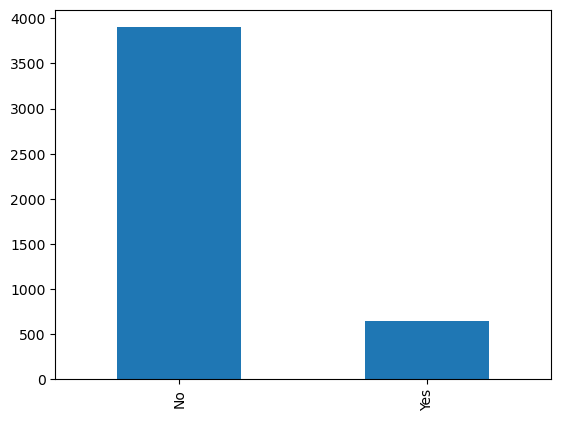

In [233]:
#4 Show a plot of the total number of responses.

mca_file['response'].value_counts().plot(kind='bar')

In [234]:
#5 Show a plot of the response rate by the sales channel.

#generate response rate
mca_file['response rate'] = np.where(mca_file['response'] == "Yes", 1, 0)

mca_file['response rate'].head()

2     0
3     1
10    0
13    0
16    0
Name: response rate, dtype: int64

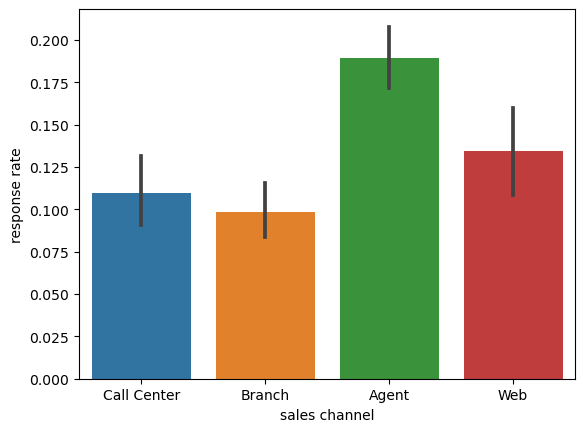

In [235]:
#plot

import matplotlib.pyplot as plt
import seaborn as sns

mca_file
sns.barplot(x ="sales channel",y = "response rate", data = mca_file)
plt.show()


In [236]:
mca_file.head(3)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months,response rate
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,0
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January,0


In [237]:
#6 Show a plot of the response rate by the total claim amount.

# find max to establish bins (range - min 0)
mca_file['total claim amount'].max()

#min 0

2893.239678

In [238]:
#list groups names 
claim_divisions = ['0-500', '500-100','1000-1500','1500-2000','>2000']

#create group division
g1 = pd.cut(mca_file['total claim amount'], labels = claim_divisions, bins=5)

#create new column
mca_file['total claim range'] = g1

display(mca_file.head())

#check grouping worked 
display(g1.value_counts())


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months,response rate,total claim range
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,0,0-500
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1,0-500
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January,0,0-500
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January,0,0-500
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February,0,0-500


0-500        3559
500-100       854
1000-1500     107
1500-2000      20
>2000           3
Name: total claim amount, dtype: int64

<AxesSubplot:xlabel='total claim range', ylabel='response rate'>

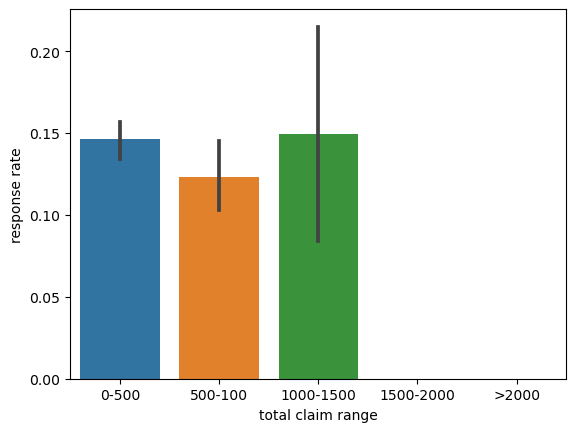

In [239]:
sns.barplot(x='total claim range', y = 'response rate', data = mca_file)

In [240]:
#7 Show a plot of the response rate by income.

#create another group division
g2 = pd.cut(mca_file['income'], labels = claim_divisions, bins=5)

#create a new column
mca_file['income range'] = g2

display(mca_file.head())

#check grouping worked 
display(g2.value_counts())


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months,response rate,total claim range,income range
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,Offer3,Call Center,480.000000,SUV,Medsize,A,February,0,0-500,500-100
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1,0-500,1000-1500
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,Offer2,Branch,442.521087,SUV,Large,A,January,0,0-500,>2000
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January,0,0-500,1500-2000
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February,0,0-500,1500-2000


0-500        1433
500-100      1107
1000-1500     780
1500-2000     729
>2000         494
Name: income, dtype: int64

<AxesSubplot:xlabel='income range', ylabel='response rate'>

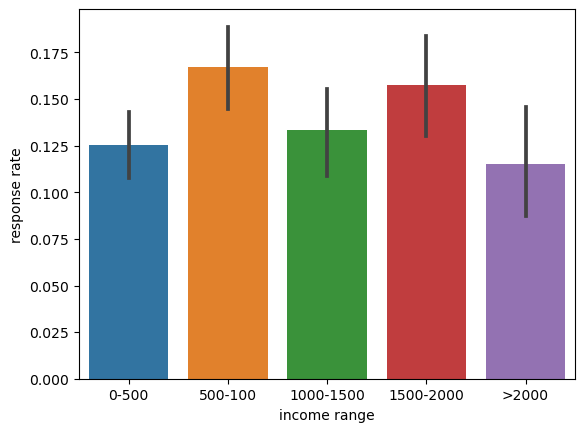

In [241]:
sns.barplot(x='income range', y = 'response rate', data = mca_file)

# lab - round 4

In [242]:
"""
In today's lesson we talked about continuous distributions (mainly normal distribution),
linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on
those things using the marketing_customer_analysis.csv file. You have been using the same data in
the previous labs (round 2 and 3). You can continue using the same jupyter file.
The file can be found in the files_for_lab folder.

Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

Complete the following task
1.Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2.Now we will try to check the normality of the numerical variables visually
3.Use seaborn library to construct distribution plots for the numerical variables
3.1. Use Matplotlib to construct histograms
3.2. Do the distributions for different numerical variables look like a normal distribution
3.3. For the numerical variables, check the multicollinearity between the features.
Please note that we will use the column total_claim_amount later as the target variable.
4. Drop one of the two features that show a high correlation between them (greater than 0.9).
Write code for both the correlation matrix and for seaborn heatmap.
If there is no pair of features that have a high correlation, then do not drop any features
"""

"\nIn today's lesson we talked about continuous distributions (mainly normal distribution),\nlinear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on\nthose things using the marketing_customer_analysis.csv file. You have been using the same data in\nthe previous labs (round 2 and 3). You can continue using the same jupyter file.\nThe file can be found in the files_for_lab folder.\n\nGet the data\nUse the jupyter file from the last lab (Customer Analysis Round 3)\n\nComplete the following task\n1.Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)\n2.Now we will try to check the normality of the numerical variables visually\n3.Use seaborn library to construct distribution plots for the numerical variables\n3.1. Use Matplotlib t

In [243]:
# 1.Check the data types of the columns.
mca_file.dtypes


unnamed: 0                          int64
customer                           object
state                              object
customer lifetime value           float64
response                           object
coverage                           object
education                          object
effective to date                  object
employmentstatus                   object
gender                             object
income                              int64
location code                      object
marital status                     object
monthly premium auto                int64
months since last claim           float64
months since policy inception       int64
number of open complaints         float64
number of policies                  int64
policy type                        object
policy                             object
renew offer type                   object
sales channel                      object
total claim amount                float64
vehicle class                     

In [244]:
# 1.1 Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
# (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

numerical = mca_file.select_dtypes(include = np.number)
display(numerical.head())

categorical = mca_file.select_dtypes(include = np.object)
display(categorical.head())

#category type (new columns created)?


,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,response rate
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087,0
13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000,0
16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579,0


/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_90480/3195844019.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = mca_file.select_dtypes(include = np.object)


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,months
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A,January
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A,January
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A,February


In [245]:
#2.Now we will try to check the normality of the numerical variables visually
#2.1.Use seaborn library to construct distribution plots for the numerical variables
#2.2. Use Matplotlib to construct histograms
#2.3. Do the distributions for different numerical variables look like a normal distribution

numerical.head(2)



,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,response rate
2,2,14947.91730,22139,100,34.0,31,0.0,2,480.000000,0
3,3,22332.43946,49078,97,10.0,3,0.0,2,484.013411,1


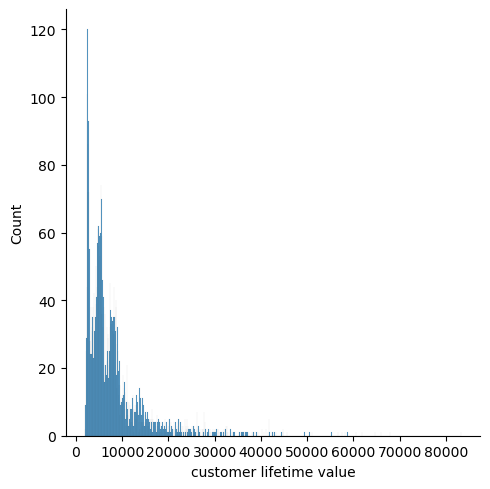

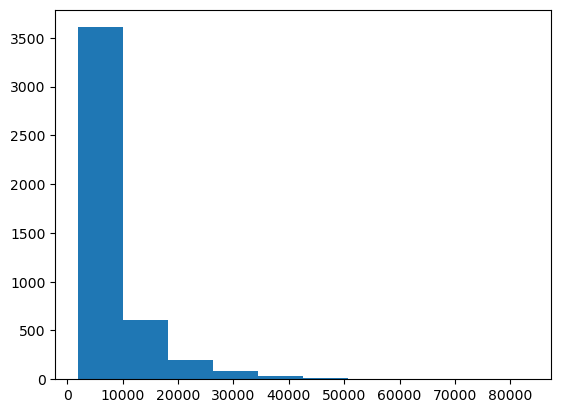

In [246]:
#Customer lifetime value is not normally distributed, as it's skewed to the right.

sns.displot(numerical['customer lifetime value'], bins = 1000)
plt.show()

plt.hist(numerical['customer lifetime value'])
plt.show()

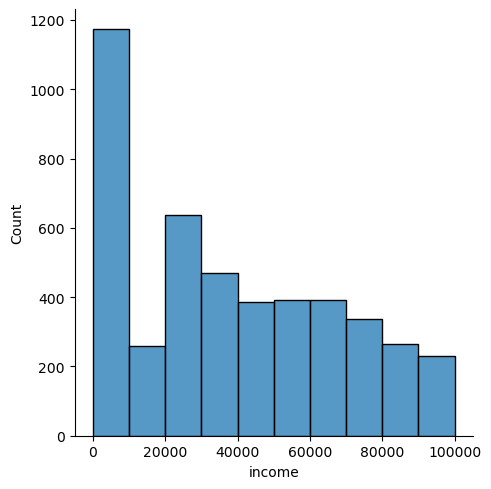

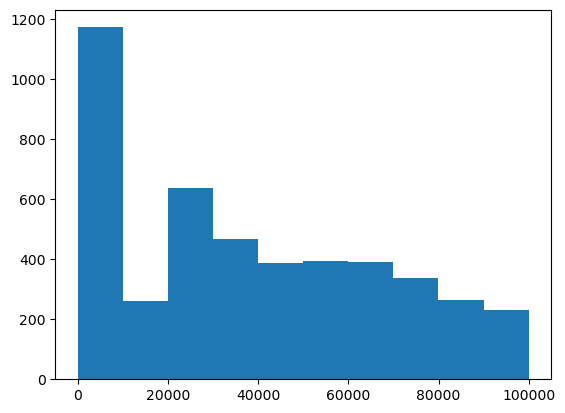

In [247]:
#Income is not normally distributed

sns.displot(numerical['income'], bins = 10)
plt.show()

plt.hist(numerical['income'])
plt.show()

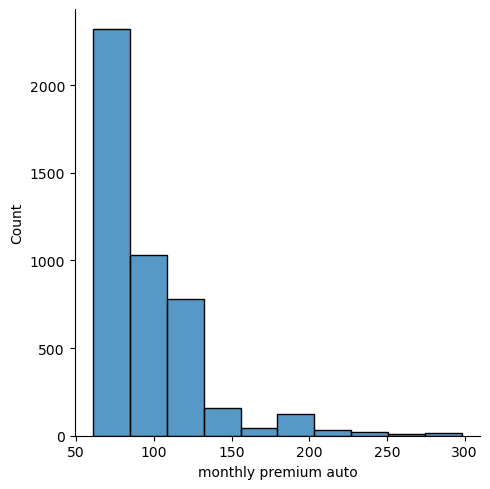

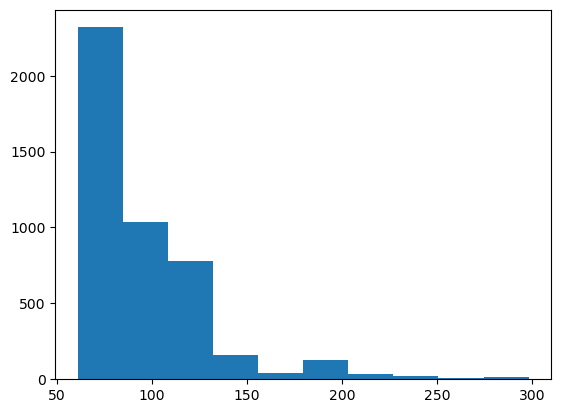

In [248]:
#Monthly premium auto is not normally distributed.

sns.displot(numerical['monthly premium auto'], bins = 10)
plt.show()

plt.hist(numerical['monthly premium auto'])
plt.show()

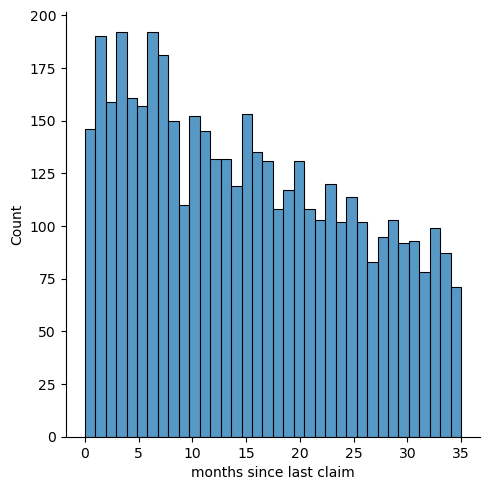

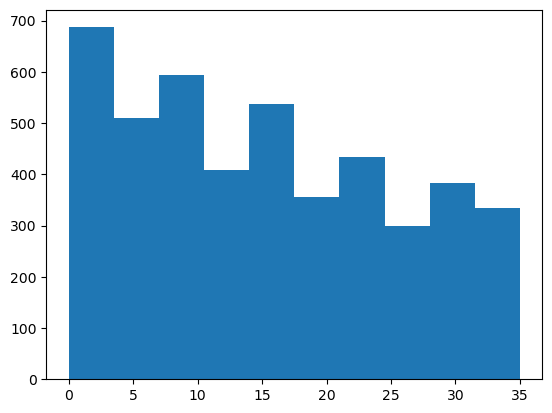

In [249]:
#Months since last claim is not normally distributed.

sns.displot(numerical['months since last claim'], bins = 36)
plt.show()

plt.hist(numerical['months since last claim'])
plt.show()


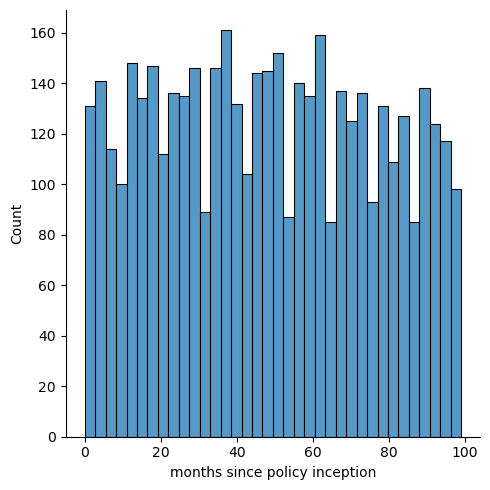

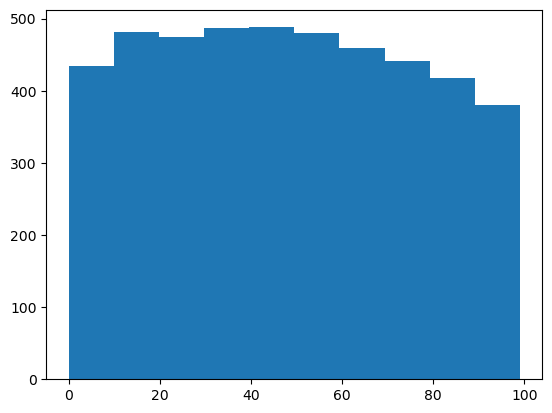

In [250]:
#Months since policy inception is not normally distributed.

sns.displot(numerical['months since policy inception'], bins = 36)
plt.show()

plt.hist(numerical['months since policy inception'])
plt.show()


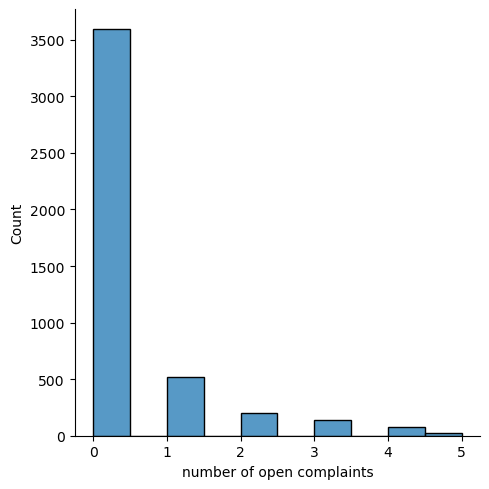

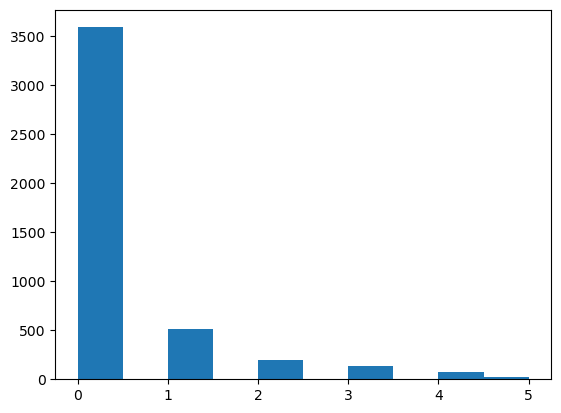

In [251]:
#Number of open complaints is not normally distributed.

sns.displot(numerical['number of open complaints'], bins = 10)
plt.show()

plt.hist(numerical['number of open complaints'])
plt.show()


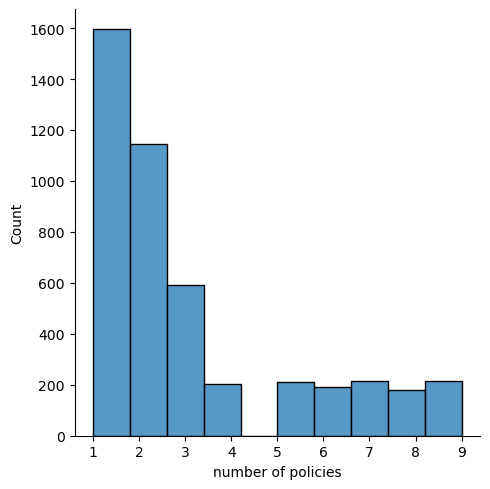

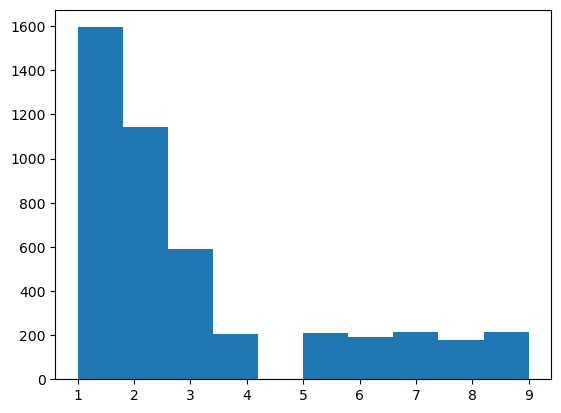

In [252]:
#Number of policies is not normally distributed.

sns.displot(numerical['number of policies'], bins = 10)
plt.show()

plt.hist(numerical['number of policies'])
plt.show()


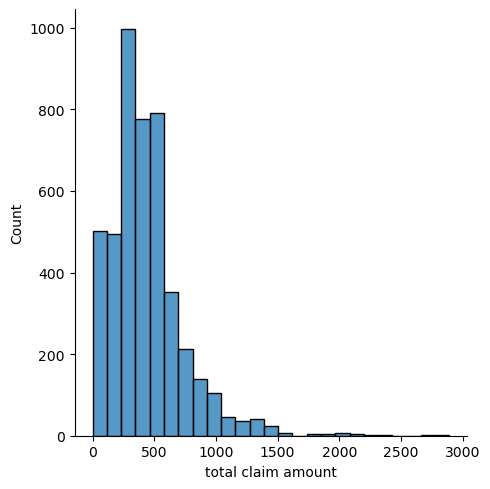

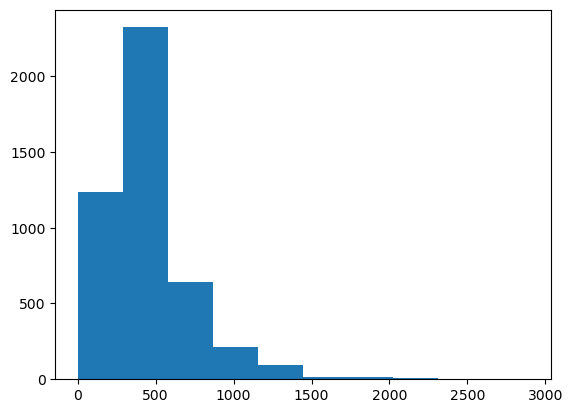

In [253]:
#total claim amount is not normally distributed.

sns.displot(numerical['total claim amount'], bins = 25)
plt.show()

plt.hist(numerical['total claim amount'])
plt.show()


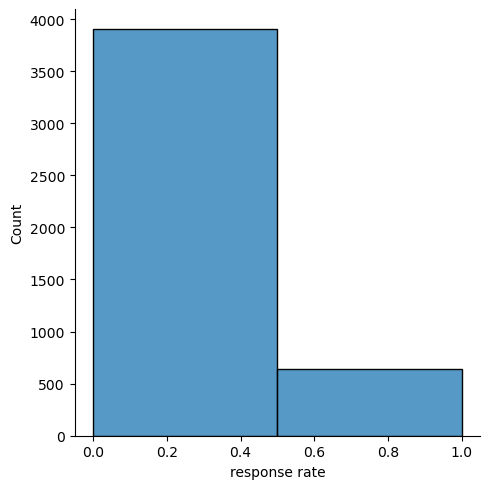

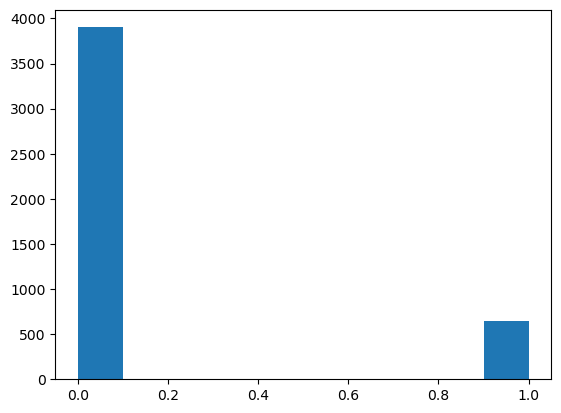

In [254]:
#Response rate is not normally distributed.

sns.displot(numerical['response rate'], bins = 2)
plt.show()

plt.hist(numerical['response rate'])
plt.show()


In [255]:
#3. For the numerical variables, check the multicollinearity between the features.
#Please note that we will use the column total_claim_amount later as the target variable.

# variance inflation factor (VIF) ??? essentialy the same, also looks for correlation

"""
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)
"""

'\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n  \n# creating dummies for gender\ndata[\'Gender\'] = data[\'Gender\'].map({\'Male\':0, \'Female\':1})\n  \n# the independent variables set\nX = data[[\'Gender\', \'Height\', \'Weight\']]\n  \n# VIF dataframe\nvif_data = pd.DataFrame()\nvif_data["feature"] = X.columns\n  \n# calculating VIF for each feature\nvif_data["VIF"] = [variance_inflation_factor(X.values, i)\n                          for i in range(len(X.columns))]\n  \nprint(vif_data)\n'

In [256]:
#4. Drop one of the two features that show a high correlation between them (greater than 0.9).
# Write code for both the correlation matrix and for seaborn heatmap.
# If there is no pair of features that have a high correlation, then do not drop any features

In [257]:
correlations_matrix = mca_file.corr()
correlations_matrix

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,response rate
unnamed: 0,1.000000,0.018506,0.002476,-0.002327,-0.012626,0.016022,-0.007972,-0.004518,-0.008315,-0.010227
customer lifetime value,0.018506,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579,-0.018783
income,0.002476,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311,0.019743
monthly premium auto,-0.002327,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894,0.013683
months since last claim,-0.012626,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449,-0.013800
months since policy inception,0.016022,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610,-0.005092
number of open complaints,-0.007972,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433,-0.008796
number of policies,-0.004518,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864,-0.015159
total claim amount,-0.008315,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000,0.018033
response rate,-0.010227,-0.018783,0.019743,0.013683,-0.013800,-0.005092,-0.008796,-0.015159,0.018033,1.000000


<AxesSubplot:>

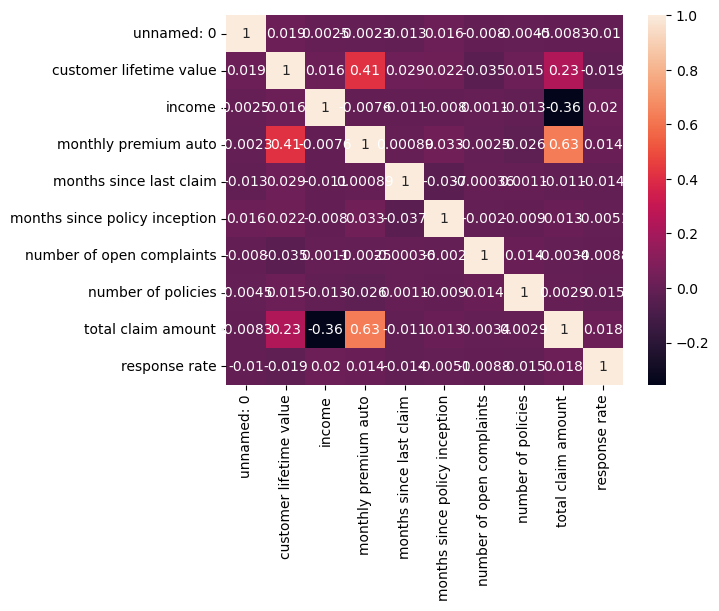

In [258]:
sns.heatmap(correlations_matrix, annot = True)

In [ ]:
#As most values are close to 0, most features are vaguely correlated.

#Highest coefficient is 0.63 between 'Total Claim amount' & 'Monthly Premium Auto'.